#Importing Liberaries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Loading Bankruptcy Dataset

In [5]:
df=pd.read_excel('Bankruptcy_Dataset.xlsx')
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [6]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [8]:
df.shape

(250, 7)

In [9]:
df['class'].value_counts()

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

In [10]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

#Exploratory Data Analysis

industrial_risk             Axes(0.125,0.653529;0.352273x0.226471)
management_risk          Axes(0.547727,0.653529;0.352273x0.226471)
financial_flexibility       Axes(0.125,0.381765;0.352273x0.226471)
credibility              Axes(0.547727,0.381765;0.352273x0.226471)
competitiveness                 Axes(0.125,0.11;0.352273x0.226471)
operating_risk               Axes(0.547727,0.11;0.352273x0.226471)
dtype: object

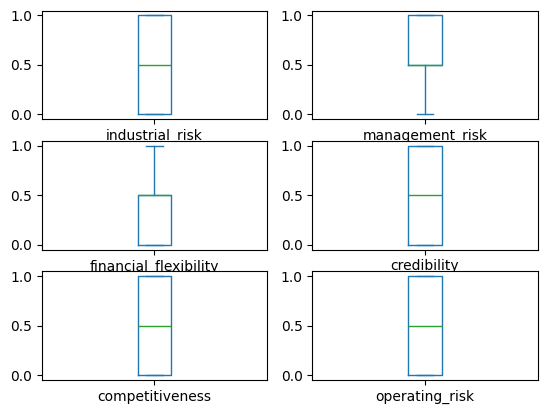

In [11]:
df.plot(kind='box',subplots=True,layout=(3,2))

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

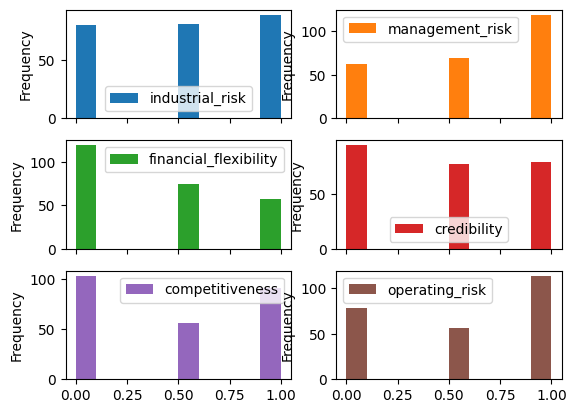

In [12]:
df.plot(kind='hist',subplots=True,layout=(3,2))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

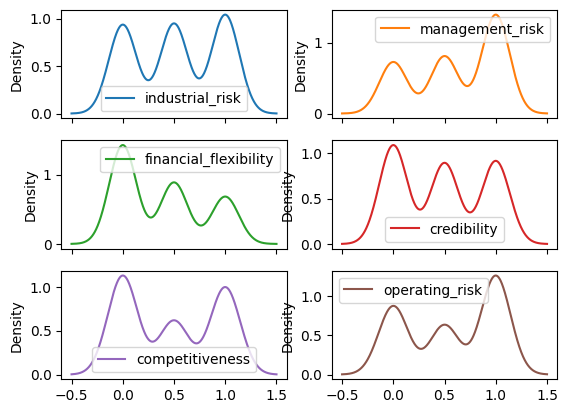

In [13]:
df.plot(kind='kde',subplots=True,layout=(3,2))

<Axes: xlabel='industrial_risk', ylabel='count'>

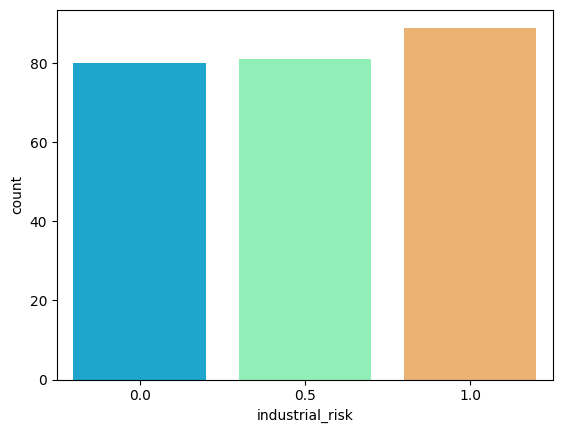

In [14]:
sns.countplot(x='industrial_risk',data=df,palette='rainbow')

<Axes: xlabel='industrial_risk'>

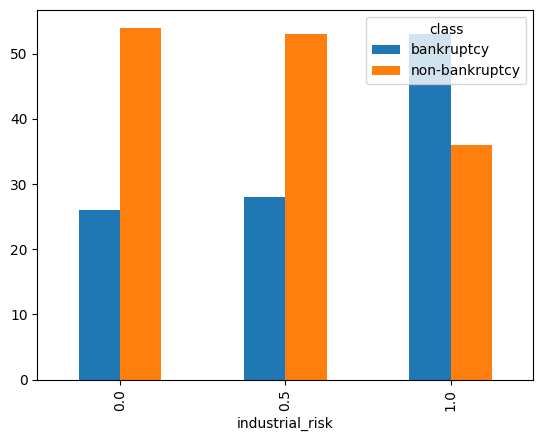

In [15]:
pd.crosstab(df['industrial_risk'],df['class']).plot(kind='bar')

<Axes: xlabel='management_risk', ylabel='count'>

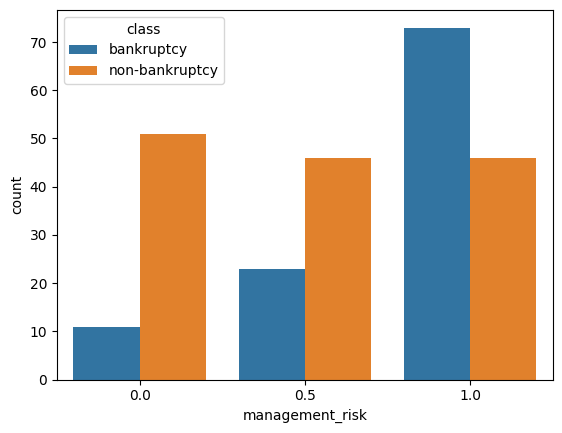

In [16]:
sns.countplot(x='management_risk',data=df,hue='class')

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [18]:
corr=df.corr()
corr

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<Axes: >

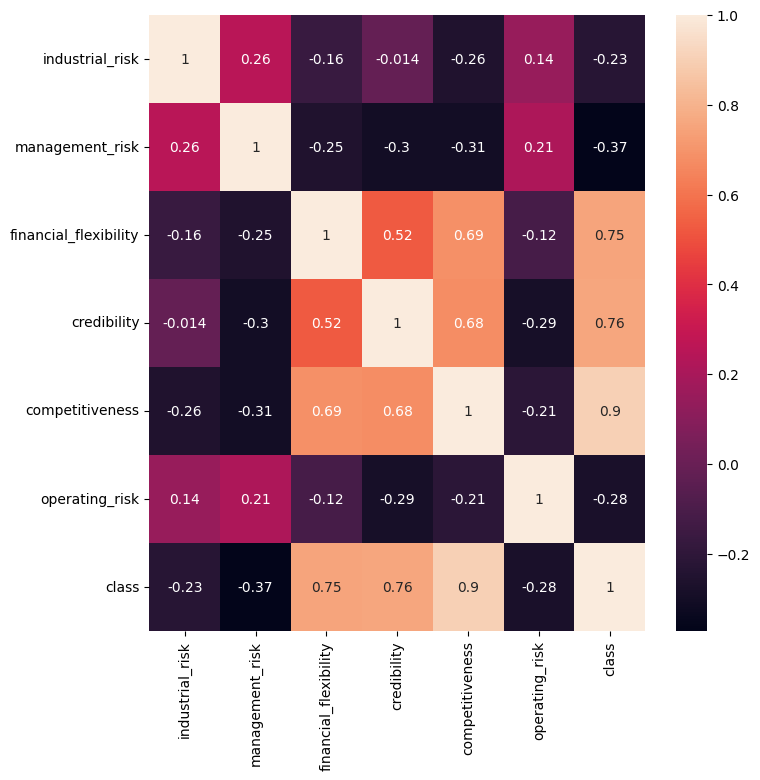

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

In [20]:
#import libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [21]:
# Split into train-test sets
x=df.drop('class',axis=1)
y=df['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(175, 6)
(75, 6)
(175,)
(75,)


#Model Building

In [23]:
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)
print(accuracy_score(y_test,y_pred_lr))
acc_lr=accuracy_score(y_test,y_pred_lr)
model_lr.predict_proba(x_test)

1.0


array([[0.04646178, 0.95353822],
       [0.96495349, 0.03504651],
       [0.91492044, 0.08507956],
       [0.9454184 , 0.0545816 ],
       [0.00519697, 0.99480303],
       [0.19758799, 0.80241201],
       [0.01225822, 0.98774178],
       [0.04862987, 0.95137013],
       [0.9302347 , 0.0697653 ],
       [0.97107695, 0.02892305],
       [0.03526611, 0.96473389],
       [0.42004757, 0.57995243],
       [0.08773644, 0.91226356],
       [0.22861453, 0.77138547],
       [0.9302347 , 0.0697653 ],
       [0.02017792, 0.97982208],
       [0.48476782, 0.51523218],
       [0.96438477, 0.03561523],
       [0.01490764, 0.98509236],
       [0.97154196, 0.02845804],
       [0.09141774, 0.90858226],
       [0.93400833, 0.06599167],
       [0.04186681, 0.95813319],
       [0.9349422 , 0.0650578 ],
       [0.04923089, 0.95076911],
       [0.96380718, 0.03619282],
       [0.91492044, 0.08507956],
       [0.9349422 , 0.0650578 ],
       [0.97107695, 0.02892305],
       [0.1973606 , 0.8026394 ],
       [0.

In [24]:
model_gb=GaussianNB()
model_gb.fit(x_train,y_train)
y_pred_gb=model_gb.predict(x_test)
print(accuracy_score(y_test,y_pred_gb))
acc_gb=accuracy_score(y_test,y_pred_gb)

1.0


In [25]:
model_mn=MultinomialNB()
model_mn.fit(x_train,y_train)
y_pred_mn=model_mn.predict(x_test)
print(accuracy_score(y_test,y_pred_mn))
acc_mn=accuracy_score(y_test,y_pred_mn)

1.0


In [26]:
model_svm=SVC()
model_svm.fit(x_train,y_train)
y_pred_svm=model_svm.predict(x_test)
print(accuracy_score(y_test,y_pred_svm))

1.0


In [27]:
kernel=['linear','rbf','polynomial']
C=[5,10,12,15,16]
gamma=[50,5,10,6]
param_grid=dict(kernel=kernel,C=C,gamma=gamma)
grid=GridSearchCV(estimator=SVC(),param_grid=param_grid)
grid.fit(x_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
acc_svm=grid.best_score_

0.9942857142857143
{'C': 5, 'gamma': 50, 'kernel': 'linear'}


In [28]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)
print(accuracy_score(y_test,y_pred_knn))

0.9866666666666667


In [29]:
n_neigh=np.arange(1,30)
param_grid=dict(n_neighbors=n_neigh)
grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param_grid)
grid.fit(x_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
acc_knn=grid.best_score_

0.9942857142857143
{'n_neighbors': np.int64(1)}


#Model Evaluation

In [30]:
w=['LOGISTIC_REGRESSION','SVM','GAUSSIAN_NB','MULTINOMIAL_NB','KNN']
a=[acc_lr,acc_svm,acc_gb,acc_mn,acc_knn]
acc_data=pd.DataFrame({'Algorithms':w,'Accuracy':a})
acc_data.sort_values(by='Accuracy',ascending=False,inplace=True)
acc_data.set_index('Algorithms')

,Accuracy
Algorithms,
LOGISTIC_REGRESSION,1.000000
GAUSSIAN_NB,1.000000
MULTINOMIAL_NB,1.000000
SVM,0.994286
KNN,0.994286


In [31]:
#Choosing Best predecting model
accuracies = {'LOGISTIC_REGRESSION': acc_lr, 'SVM': acc_svm, 'GAUSSIAN_NB': acc_gb, 'MULTINOMIAL_NB': acc_mn, 'KNN': acc_knn} # Define the accuracies dictionary
best_model = max(accuracies, key=accuracies.get) # Changed min to max to find the best model (highest accuracy)
print(f'The best model is: {best_model} with accuracy = {accuracies[best_model]:.2f}')

The best model is: LOGISTIC_REGRESSION with accuracy = 1.00


In [32]:
import pickle

# Saving the trained Logistic Regression classifier using pickle
with open('LOGISTIC_REGRESSION.pkl', 'wb') as file:
    pickle.dump(model_lr, file)